# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
#import matplotlib.pyplot as plt

from dl4cv.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `dl4cv/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
#from dl4cv.classifiers.neural_net import TwoLayerNet

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()

#net.test()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `dl4cv/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the Softmax exercise: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. Please first read the class description in the file, in particular note that for this exercise we use ReLU non-linearities.

In [4]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores
print

# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))
#net.test()

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207459e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [5]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [6]:
from dl4cv.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447656e-11
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the Softmax classifier. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the Softmax classifier. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

('data shape X_pca; ', (5, 4))
('data shape x: ', (5, 4))
('iterations_per_epoch', 1)


Final training loss:  0.0201519742023


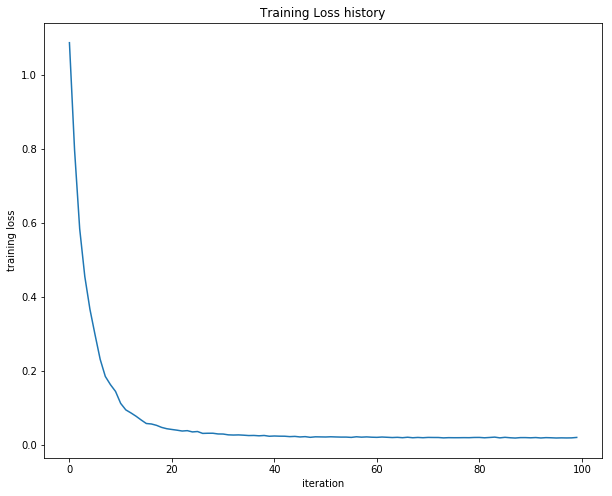

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print 'Final training loss: ', stats['loss_history'][-1]

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

Train data shape:  (48000, 3072)
Train labels shape:  (48000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)
dev data shape:  (500, 3072)
dev labels shape:  (500,)


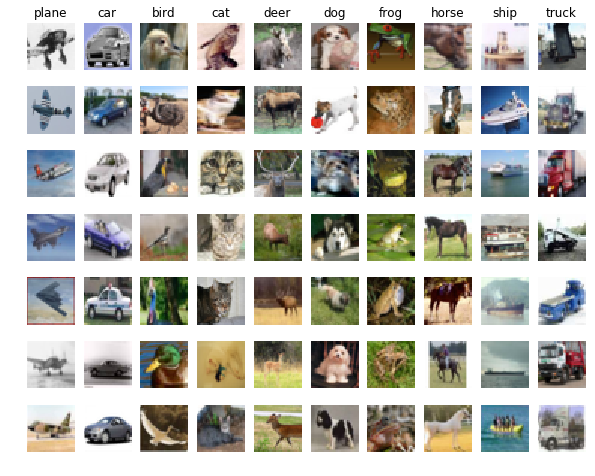

In [7]:
from dl4cv.data_utils import load_CIFAR10
from dl4cv.vis_utils import visualize_cifar10

def get_CIFAR10_data(num_training=48000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/'
    X, y = load_CIFAR10(cifar10_dir)
    

    # Our training set will be the first num_train points from the original
    # training set.
    mask = range(num_training)
    X_train = X[mask]
    y_train = y[mask]
    
    
    # Our validation set will be num_validation points from the original
    # training set.
    mask = range(num_training, num_training + num_validation)
    X_val = X[mask]
    y_val = y[mask]
    
    # We use a small subset of the training set as our test set.
    mask = range(num_training + num_validation, num_training + num_validation + num_test)
    X_test = X[mask]
    y_test = y[mask]
    
    # We will also make a development set, which is a small subset of
    # the training set. This way the development cycle is faster.
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]

    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image

    std_feat = np.std(X_train, axis=0, keepdims=True)
    X_train /= std_feat
    X_val /= std_feat
    X_test /= std_feat
    X_dev /=std_feat

    return X, y, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_raw, y_raw, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape
print 'dev data shape: ', X_dev.shape
print 'dev labels shape: ', y_dev.shape

# visualize raw data
visualize_cifar10(X_raw, y_raw)

In [43]:
net = nnet

# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [38]:
from dl4cv.data_utils import cartesian

input_size = 32 * 32 * 3
hidden_size = 200
num_classes = 10
#net = TwoLayerNet(input_size, hidden_size, num_classes)

# Reinitialize the NN Parameters
net.reinit_params(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=4000, batch_size=300,
            learning_rate=0.1, learning_rate_decay=0.95,
            reg=0.2, verbose=True,trainafresh=False)


# Predict on the validation set
val_acc = (net.predict(X_train) == y_train).mean()
print 'Testing accuracy: ', val_acc
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc
stuff = cartesian(([1,2,3],[4,5]))
x = stuff[1]
print(x[0])
print(stuff[0][1])

dl4cv/classifiers/neural_net.py:230: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(trainafresh == True or self.pca == None or self.Xpca == None):


('data shape X_pca; ', (48000, 3072))
('data shape x: ', (48000, 3072))
('iterations_per_epoch', 160)
iteration 0 / 4000: loss 2.303200


('learning rate on iteration: ', 0, ' is: ', 0.095)
('loss: ', 2.3031997919923528)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.091999999999999998)


iteration 100 / 4000: loss 2.111148


('learning rate on iteration: ', 160, ' is: ', 0.09025)
('loss: ', 2.0630558762594919)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.308)


iteration 200 / 4000: loss 2.041726


iteration 300 / 4000: loss 2.008302


('learning rate on iteration: ', 320, ' is: ', 0.0857375)
('loss: ', 2.0270513712831808)
('train acc: ', 0.096666666666666665)
('val acc: ', 0.33000000000000002)


iteration 400 / 4000: loss 1.986989


('learning rate on iteration: ', 480, ' is: ', 0.08145062499999998)
('loss: ', 2.0495867993142958)
('train acc: ', 0.080000000000000002)
('val acc: ', 0.36599999999999999)


iteration 500 / 4000: loss 1.961193


iteration 600 / 4000: loss 1.995306


('learning rate on iteration: ', 640, ' is: ', 0.07737809374999999)
('loss: ', 1.9409021921238361)
('train acc: ', 0.080000000000000002)
('val acc: ', 0.34799999999999998)


iteration 700 / 4000: loss 1.995309


iteration 800 / 4000: loss 1.988422


('learning rate on iteration: ', 800, ' is: ', 0.07350918906249998)
('loss: ', 1.988421574639567)
('train acc: ', 0.096666666666666665)
('val acc: ', 0.36599999999999999)


iteration 900 / 4000: loss 2.024562


('learning rate on iteration: ', 960, ' is: ', 0.06983372960937498)
('loss: ', 1.9594728763309448)
('train acc: ', 0.096666666666666665)
('val acc: ', 0.36599999999999999)


iteration 1000 / 4000: loss 1.921177


iteration 1100 / 4000: loss 1.967771


('learning rate on iteration: ', 1120, ' is: ', 0.06634204312890622)
('loss: ', 2.0520453278041901)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.36599999999999999)


iteration 1200 / 4000: loss 2.018492


('learning rate on iteration: ', 1280, ' is: ', 0.0630249409724609)
('loss: ', 1.9840171678896346)
('train acc: ', 0.080000000000000002)
('val acc: ', 0.373)


iteration 1300 / 4000: loss 1.992547


iteration 1400 / 4000: loss 1.989212


('learning rate on iteration: ', 1440, ' is: ', 0.05987369392383786)
('loss: ', 2.0389546174164921)
('train acc: ', 0.096666666666666665)
('val acc: ', 0.38)


iteration 1500 / 4000: loss 2.024080


iteration 1600 / 4000: loss 2.011975


('learning rate on iteration: ', 1600, ' is: ', 0.05688000922764597)
('loss: ', 2.0119748299095401)
('train acc: ', 0.10666666666666667)
('val acc: ', 0.36899999999999999)


iteration 1700 / 4000: loss 1.980880


('learning rate on iteration: ', 1760, ' is: ', 0.05403600876626367)
('loss: ', 1.9921673618197848)
('train acc: ', 0.070000000000000007)
('val acc: ', 0.38200000000000001)


iteration 1800 / 4000: loss 2.020110


iteration 1900 / 4000: loss 1.987299


('learning rate on iteration: ', 1920, ' is: ', 0.05133420832795048)
('loss: ', 2.0055722745351758)
('train acc: ', 0.11333333333333333)
('val acc: ', 0.35799999999999998)


iteration 2000 / 4000: loss 1.968872


('learning rate on iteration: ', 2080, ' is: ', 0.04876749791155295)
('loss: ', 1.9519840783045714)
('train acc: ', 0.08666666666666667)
('val acc: ', 0.372)


iteration 2100 / 4000: loss 1.975402


iteration 2200 / 4000: loss 1.980371


('learning rate on iteration: ', 2240, ' is: ', 0.046329123015975304)
('loss: ', 1.9743569080170671)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.371)


iteration 2300 / 4000: loss 2.042220


iteration 2400 / 4000: loss 2.063032


('learning rate on iteration: ', 2400, ' is: ', 0.04401266686517654)
('loss: ', 2.0630319580307899)
('train acc: ', 0.10666666666666667)
('val acc: ', 0.38300000000000001)


iteration 2500 / 4000: loss 2.007249


('learning rate on iteration: ', 2560, ' is: ', 0.04181203352191771)
('loss: ', 1.9474394940748305)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.377)


iteration 2600 / 4000: loss 1.930808


iteration 2700 / 4000: loss 1.983102


('learning rate on iteration: ', 2720, ' is: ', 0.039721431845821824)
('loss: ', 2.0286659007548522)
('train acc: ', 0.11)
('val acc: ', 0.38)


iteration 2800 / 4000: loss 2.029114


('learning rate on iteration: ', 2880, ' is: ', 0.037735360253530734)
('loss: ', 2.0328432504374576)
('train acc: ', 0.11666666666666667)
('val acc: ', 0.374)


iteration 2900 / 4000: loss 1.963937


iteration 3000 / 4000: loss 1.998972


('learning rate on iteration: ', 3040, ' is: ', 0.035848592240854196)
('loss: ', 1.9546360040586295)
('train acc: ', 0.08666666666666667)
('val acc: ', 0.36399999999999999)


iteration 3100 / 4000: loss 1.996959


iteration 3200 / 4000: loss 1.993274


('learning rate on iteration: ', 3200, ' is: ', 0.03405616262881148)
('loss: ', 1.9932736400673134)
('train acc: ', 0.096666666666666665)
('val acc: ', 0.373)


iteration 3300 / 4000: loss 1.964479


('learning rate on iteration: ', 3360, ' is: ', 0.03235335449737091)
('loss: ', 2.0261981379303298)
('train acc: ', 0.12)
('val acc: ', 0.374)


iteration 3400 / 4000: loss 1.990884


iteration 3500 / 4000: loss 1.935840


('learning rate on iteration: ', 3520, ' is: ', 0.030735686772502362)
('loss: ', 2.0413802925332294)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.36899999999999999)


iteration 3600 / 4000: loss 1.985661


('learning rate on iteration: ', 3680, ' is: ', 0.029198902433877242)
('loss: ', 1.9895294521777251)
('train acc: ', 0.08666666666666667)
('val acc: ', 0.38300000000000001)


iteration 3700 / 4000: loss 2.025872


iteration 3800 / 4000: loss 2.014657


('learning rate on iteration: ', 3840, ' is: ', 0.027738957312183378)
('loss: ', 1.9597434016262192)
('train acc: ', 0.11)
('val acc: ', 0.36699999999999999)


iteration 3900 / 4000: loss 2.012959


Testing accuracy:  0.386708333333


Validation accuracy:  0.373
1
4


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.26 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

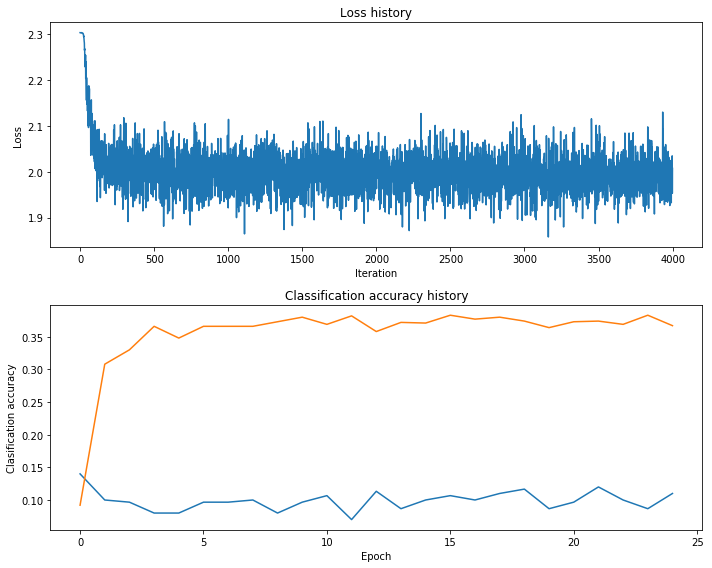

In [39]:
# Plot the loss function and train / validation accuracies
#import matplotlib.pyplot as plt
plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

plt.tight_layout()
plt.show()

In [28]:
from dl4cv.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    fig = plt.figure(figsize=(20,20))
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.legend()
    plt.show()

show_net_weights(net)

/home/neha/Documents/TUM_Books/projects/practical_dlrw/virtualEnv/practical_dlrw/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should aim to achieve a classification accuracy of greater than 48% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**We highly encourage you to use this opportunity to get a feel for your machine learning system. Consider this kind of tuning as an essential part of getting the most out of your neural network.**

In [47]:
import time
from dl4cv.classifiers.neural_net import TwoLayerNet
from dl4cv.data_utils import cartesian

best_net = None # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
#pass


# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1
#learning_rates = [1e-7, 5e-7]
#regularization_strengths = [5e4, 1e5]
learning_rates = [0.105,0.115]#[1e-3]#[1e-6,1e-5,1e-4,1e-3,1e-2]#[1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7]
regularization_strengths = [0.01]#[0.1]#[1e1,5e1,1e2,5e2,1e3,5e3,1e4,5e4,1e5,5e5]
learning_rate_decay = [0.95,0.90]#[0.95,0.85]
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10

#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
#for lr, reg in sorted(results):
#    train_accuracy, val_accuracy = results[(lr, reg)]
#    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
#                lr, reg, train_accuracy, val_accuracy)

hyperparameters=cartesian((learning_rates,learning_rate_decay,regularization_strengths))
hyp = np.zeros(hyperparameters.shape[1])

best_vals = (0,0)
best_key = (0,0)

#Initialize Net

#nnet = TwoLayerNet(input_size, hidden_size, num_classes)

trainagain = False

for i in range(len(hyperparameters)):
    
    hyp = hyperparameters[i]

    # Reinitialize the NN Parameters
    nnet.reinit_params(input_size, hidden_size, num_classes)
    

    #Start Timer
    tic = time.time()

    # Train the network
    stats = nnet.train(X_train, y_train, X_val, y_val, num_iters=8000, batch_size=200, 
                       learning_rate=hyp[0], learning_rate_decay=hyp[1], reg=hyp[2], verbose=True, trainafresh=trainagain)

    #Stop Timer
    toc = time.time()
    print 'That took %fs' % (toc - tic)

    # Predict on the validation set
    train_accuracy = (nnet.predict(X_train) == y_train).mean()
    val_acc = (nnet.predict(X_val) == y_val).mean()
    print 'Validation accuracy: ', val_acc




    #y_train_pred = softmax.predict(X_train)
    #print 'training accuracy: %f' % (np.mean(y_train == y_train_pred), )
    #y_val_pred = softmax.predict(X_val)
    #print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )

    results[(hyp[0],hyp[1],hyp[2])] = train_accuracy,val_acc
    if(best_vals[1] < results[(hyp[0],hyp[1],hyp[2])][1]):
        best_vals = train_accuracy,val_acc
        best_key = (hyp[0],hyp[1],hyp[2])
        best_net = nnet


#print(results)

for lr,lr_d,reg in sorted(results):
    acc = results[(lr, lr_d, reg)]
    print ('lr: ', lr, "lr_d: ", lr_d, "reg: ", reg, "      acc: ", acc)

trainagain = False

best_val=best_vals[1]
################################################################################
print 'best validation accuracy achieved during validation: %f' % best_val
print('best keys : ',best_key)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

('data shape X_pca; ', (48000, 3072))
('data shape x: ', (48000, 3072))
('iterations_per_epoch', 240)
iteration 0 / 8000: loss 2.302600


('learning rate on iteration: ', 0, ' is: ', 0.099749999999999991)
('loss: ', 2.3026001399030105)
('train acc: ', 0.155)
('val acc: ', 0.092999999999999999)


iteration 100 / 8000: loss 1.935529


iteration 200 / 8000: loss 1.686675


('learning rate on iteration: ', 240, ' is: ', 0.094762499999999986)
('loss: ', 1.6976630839846221)
('train acc: ', 0.089999999999999997)
('val acc: ', 0.40699999999999997)


iteration 300 / 8000: loss 1.555102


iteration 400 / 8000: loss 1.588462


('learning rate on iteration: ', 480, ' is: ', 0.090024374999999976)
('loss: ', 1.5903488462527886)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.45500000000000002)


iteration 500 / 8000: loss 1.543907


iteration 600 / 8000: loss 1.690003


iteration 700 / 8000: loss 1.567158


('learning rate on iteration: ', 720, ' is: ', 0.085523156249999968)
('loss: ', 1.5333925593017987)
('train acc: ', 0.125)
('val acc: ', 0.47199999999999998)


iteration 800 / 8000: loss 1.588125


iteration 900 / 8000: loss 1.500590


('learning rate on iteration: ', 960, ' is: ', 0.081246998437499968)
('loss: ', 1.5311669912655563)
('train acc: ', 0.14499999999999999)
('val acc: ', 0.48999999999999999)


iteration 1000 / 8000: loss 1.633610


iteration 1100 / 8000: loss 1.466913


iteration 1200 / 8000: loss 1.523728


('learning rate on iteration: ', 1200, ' is: ', 0.077184648515624968)
('loss: ', 1.5237283502321435)
('train acc: ', 0.115)
('val acc: ', 0.46899999999999997)


iteration 1300 / 8000: loss 1.473536


iteration 1400 / 8000: loss 1.514946


('learning rate on iteration: ', 1440, ' is: ', 0.07332541608984372)
('loss: ', 1.4730348606266601)
('train acc: ', 0.105)
('val acc: ', 0.47699999999999998)


iteration 1500 / 8000: loss 1.468216


iteration 1600 / 8000: loss 1.477695


('learning rate on iteration: ', 1680, ' is: ', 0.069659145285351526)
('loss: ', 1.3972241829854002)
('train acc: ', 0.085000000000000006)
('val acc: ', 0.51600000000000001)


iteration 1700 / 8000: loss 1.493871


iteration 1800 / 8000: loss 1.542013


iteration 1900 / 8000: loss 1.416701


('learning rate on iteration: ', 1920, ' is: ', 0.066176188021083951)
('loss: ', 1.4550480511344768)
('train acc: ', 0.125)
('val acc: ', 0.48599999999999999)


iteration 2000 / 8000: loss 1.406206


iteration 2100 / 8000: loss 1.543205


('learning rate on iteration: ', 2160, ' is: ', 0.062867378620029751)
('loss: ', 1.453331266071767)
('train acc: ', 0.12)
('val acc: ', 0.499)


iteration 2200 / 8000: loss 1.442028


iteration 2300 / 8000: loss 1.422837


iteration 2400 / 8000: loss 1.411107


('learning rate on iteration: ', 2400, ' is: ', 0.05972400968902826)
('loss: ', 1.4111070008016533)
('train acc: ', 0.085000000000000006)
('val acc: ', 0.496)


iteration 2500 / 8000: loss 1.504947


iteration 2600 / 8000: loss 1.423206


('learning rate on iteration: ', 2640, ' is: ', 0.056737809204576842)
('loss: ', 1.4419660255914435)
('train acc: ', 0.095000000000000001)
('val acc: ', 0.49099999999999999)


iteration 2700 / 8000: loss 1.254480


iteration 2800 / 8000: loss 1.449624


('learning rate on iteration: ', 2880, ' is: ', 0.053900918744347999)
('loss: ', 1.3226034747895437)
('train acc: ', 0.095000000000000001)
('val acc: ', 0.51000000000000001)


iteration 2900 / 8000: loss 1.308218


iteration 3000 / 8000: loss 1.431786


iteration 3100 / 8000: loss 1.323552


('learning rate on iteration: ', 3120, ' is: ', 0.051205872807130598)
('loss: ', 1.328073167621997)
('train acc: ', 0.16)
('val acc: ', 0.505)


iteration 3200 / 8000: loss 1.435900


iteration 3300 / 8000: loss 1.295843


('learning rate on iteration: ', 3360, ' is: ', 0.048645579166774068)
('loss: ', 1.4366751126779547)
('train acc: ', 0.115)
('val acc: ', 0.52500000000000002)


iteration 3400 / 8000: loss 1.308832


iteration 3500 / 8000: loss 1.378052


iteration 3600 / 8000: loss 1.388519


('learning rate on iteration: ', 3600, ' is: ', 0.046213300208435365)
('loss: ', 1.3885186718697324)
('train acc: ', 0.13500000000000001)
('val acc: ', 0.51600000000000001)


iteration 3700 / 8000: loss 1.332008


iteration 3800 / 8000: loss 1.428601


('learning rate on iteration: ', 3840, ' is: ', 0.043902635198013594)
('loss: ', 1.3185035081756851)
('train acc: ', 0.12)
('val acc: ', 0.51500000000000001)


iteration 3900 / 8000: loss 1.230024


iteration 4000 / 8000: loss 1.415545


('learning rate on iteration: ', 4080, ' is: ', 0.041707503438112914)
('loss: ', 1.3675308652187608)
('train acc: ', 0.115)
('val acc: ', 0.52400000000000002)


iteration 4100 / 8000: loss 1.508693


iteration 4200 / 8000: loss 1.307697


iteration 4300 / 8000: loss 1.364780


('learning rate on iteration: ', 4320, ' is: ', 0.039622128266207264)
('loss: ', 1.3656954602279934)
('train acc: ', 0.11)
('val acc: ', 0.52200000000000002)


iteration 4400 / 8000: loss 1.340904


iteration 4500 / 8000: loss 1.318463


('learning rate on iteration: ', 4560, ' is: ', 0.037641021852896896)
('loss: ', 1.2798905453670577)
('train acc: ', 0.14499999999999999)
('val acc: ', 0.51900000000000002)


iteration 4600 / 8000: loss 1.360643


iteration 4700 / 8000: loss 1.367703


iteration 4800 / 8000: loss 1.384899


('learning rate on iteration: ', 4800, ' is: ', 0.03575897076025205)
('loss: ', 1.3848987991972832)
('train acc: ', 0.13)
('val acc: ', 0.52700000000000002)


iteration 4900 / 8000: loss 1.305878


iteration 5000 / 8000: loss 1.321098


('learning rate on iteration: ', 5040, ' is: ', 0.033971022222239446)
('loss: ', 1.380849128391803)
('train acc: ', 0.13500000000000001)
('val acc: ', 0.52800000000000002)


iteration 5100 / 8000: loss 1.212089


iteration 5200 / 8000: loss 1.392139


('learning rate on iteration: ', 5280, ' is: ', 0.032272471111127472)
('loss: ', 1.3299712531364185)
('train acc: ', 0.12)
('val acc: ', 0.51500000000000001)


iteration 5300 / 8000: loss 1.290183


iteration 5400 / 8000: loss 1.527378


iteration 5500 / 8000: loss 1.411373


('learning rate on iteration: ', 5520, ' is: ', 0.030658847555571096)
('loss: ', 1.3957255682167229)
('train acc: ', 0.12)
('val acc: ', 0.52800000000000002)


iteration 5600 / 8000: loss 1.346205


iteration 5700 / 8000: loss 1.377196


('learning rate on iteration: ', 5760, ' is: ', 0.029125905177792538)
('loss: ', 1.2750967421970036)
('train acc: ', 0.11)
('val acc: ', 0.51800000000000002)


iteration 5800 / 8000: loss 1.425769


iteration 5900 / 8000: loss 1.330037


iteration 6000 / 8000: loss 1.307339


('learning rate on iteration: ', 6000, ' is: ', 0.02766960991890291)
('loss: ', 1.3073390582575699)
('train acc: ', 0.11)
('val acc: ', 0.53400000000000003)


iteration 6100 / 8000: loss 1.223522


iteration 6200 / 8000: loss 1.356720


('learning rate on iteration: ', 6240, ' is: ', 0.026286129422957764)
('loss: ', 1.1925653341510309)
('train acc: ', 0.12)
('val acc: ', 0.53300000000000003)


iteration 6300 / 8000: loss 1.266418


iteration 6400 / 8000: loss 1.347346


('learning rate on iteration: ', 6480, ' is: ', 0.024971822951809875)
('loss: ', 1.2088863197586435)
('train acc: ', 0.105)
('val acc: ', 0.54300000000000004)


iteration 6500 / 8000: loss 1.381044


iteration 6600 / 8000: loss 1.262591


iteration 6700 / 8000: loss 1.366613


('learning rate on iteration: ', 6720, ' is: ', 0.023723231804219379)
('loss: ', 1.2983734481259883)
('train acc: ', 0.155)
('val acc: ', 0.53000000000000003)


iteration 6800 / 8000: loss 1.387096


iteration 6900 / 8000: loss 1.275006


('learning rate on iteration: ', 6960, ' is: ', 0.022537070214008411)
('loss: ', 1.309363863440534)
('train acc: ', 0.080000000000000002)
('val acc: ', 0.54000000000000004)


iteration 7000 / 8000: loss 1.301912


iteration 7100 / 8000: loss 1.271382


iteration 7200 / 8000: loss 1.318580


('learning rate on iteration: ', 7200, ' is: ', 0.021410216703307991)
('loss: ', 1.318579829367613)
('train acc: ', 0.12)
('val acc: ', 0.53100000000000003)


iteration 7300 / 8000: loss 1.360773


iteration 7400 / 8000: loss 1.356599


('learning rate on iteration: ', 7440, ' is: ', 0.020339705868142592)
('loss: ', 1.333728305841539)
('train acc: ', 0.125)
('val acc: ', 0.52300000000000002)


iteration 7500 / 8000: loss 1.413940


iteration 7600 / 8000: loss 1.211928


('learning rate on iteration: ', 7680, ' is: ', 0.019322720574735462)
('loss: ', 1.2380468934789142)
('train acc: ', 0.12)
('val acc: ', 0.54300000000000004)


iteration 7700 / 8000: loss 1.141543


iteration 7800 / 8000: loss 1.287652


iteration 7900 / 8000: loss 1.215720


('learning rate on iteration: ', 7920, ' is: ', 0.018356584545998689)
('loss: ', 1.256678352663966)
('train acc: ', 0.13500000000000001)
('val acc: ', 0.52800000000000002)


That took 201.968844s


Validation accuracy:  0.521
('data shape X_pca; ', (48000, 3072))
('data shape x: ', (48000, 3072))
('iterations_per_epoch', 240)
iteration 0 / 8000: loss 2.302600


('learning rate on iteration: ', 0, ' is: ', 0.094500000000000001)
('loss: ', 2.3026003369314236)
('train acc: ', 0.13)
('val acc: ', 0.091999999999999998)


iteration 100 / 8000: loss 1.865427


iteration 200 / 8000: loss 1.871668


('learning rate on iteration: ', 240, ' is: ', 0.085050000000000001)
('loss: ', 1.7242559781076698)
('train acc: ', 0.105)
('val acc: ', 0.38600000000000001)


iteration 300 / 8000: loss 1.678672


iteration 400 / 8000: loss 1.554766


('learning rate on iteration: ', 480, ' is: ', 0.076545000000000002)
('loss: ', 1.7002982491621963)
('train acc: ', 0.115)
('val acc: ', 0.47099999999999997)


iteration 500 / 8000: loss 1.529388


iteration 600 / 8000: loss 1.695786


iteration 700 / 8000: loss 1.643206


('learning rate on iteration: ', 720, ' is: ', 0.068890500000000007)
('loss: ', 1.5189986315921364)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.48499999999999999)


iteration 800 / 8000: loss 1.602620


iteration 900 / 8000: loss 1.588664


('learning rate on iteration: ', 960, ' is: ', 0.062001450000000007)
('loss: ', 1.497620602372058)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.48199999999999998)


iteration 1000 / 8000: loss 1.466225


iteration 1100 / 8000: loss 1.473229


iteration 1200 / 8000: loss 1.494054


('learning rate on iteration: ', 1200, ' is: ', 0.055801305000000009)
('loss: ', 1.4940535858513206)
('train acc: ', 0.11)
('val acc: ', 0.48599999999999999)


iteration 1300 / 8000: loss 1.475129


iteration 1400 / 8000: loss 1.357868


('learning rate on iteration: ', 1440, ' is: ', 0.050221174500000007)
('loss: ', 1.4414866686457817)
('train acc: ', 0.13)
('val acc: ', 0.50800000000000001)


iteration 1500 / 8000: loss 1.391352


iteration 1600 / 8000: loss 1.346990


('learning rate on iteration: ', 1680, ' is: ', 0.045199057050000005)
('loss: ', 1.5471419628702467)
('train acc: ', 0.12)
('val acc: ', 0.5)


iteration 1700 / 8000: loss 1.485766


iteration 1800 / 8000: loss 1.465436


iteration 1900 / 8000: loss 1.375055


('learning rate on iteration: ', 1920, ' is: ', 0.040679151345000004)
('loss: ', 1.5433548314706482)
('train acc: ', 0.105)
('val acc: ', 0.51200000000000001)


iteration 2000 / 8000: loss 1.363884


iteration 2100 / 8000: loss 1.389524


('learning rate on iteration: ', 2160, ' is: ', 0.036611236210500005)
('loss: ', 1.4494862872741943)
('train acc: ', 0.125)
('val acc: ', 0.50900000000000001)


iteration 2200 / 8000: loss 1.279645


iteration 2300 / 8000: loss 1.541435


iteration 2400 / 8000: loss 1.445268


('learning rate on iteration: ', 2400, ' is: ', 0.032950112589450006)
('loss: ', 1.4452676007315943)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.50800000000000001)


iteration 2500 / 8000: loss 1.399333


iteration 2600 / 8000: loss 1.409822


('learning rate on iteration: ', 2640, ' is: ', 0.029655101330505005)
('loss: ', 1.4608949727223228)
('train acc: ', 0.115)
('val acc: ', 0.52500000000000002)


iteration 2700 / 8000: loss 1.387208


iteration 2800 / 8000: loss 1.353454


('learning rate on iteration: ', 2880, ' is: ', 0.026689591197454506)
('loss: ', 1.3795419094255785)
('train acc: ', 0.16)
('val acc: ', 0.52600000000000002)


iteration 2900 / 8000: loss 1.371980


iteration 3000 / 8000: loss 1.428482


iteration 3100 / 8000: loss 1.477431


('learning rate on iteration: ', 3120, ' is: ', 0.024020632077709055)
('loss: ', 1.3355046241840711)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.5)


iteration 3200 / 8000: loss 1.352830


iteration 3300 / 8000: loss 1.403287


('learning rate on iteration: ', 3360, ' is: ', 0.02161856886993815)
('loss: ', 1.2966645071526617)
('train acc: ', 0.065000000000000002)
('val acc: ', 0.52200000000000002)


iteration 3400 / 8000: loss 1.393238


iteration 3500 / 8000: loss 1.430475


iteration 3600 / 8000: loss 1.432550


('learning rate on iteration: ', 3600, ' is: ', 0.019456711982944335)
('loss: ', 1.4325504261770519)
('train acc: ', 0.13500000000000001)
('val acc: ', 0.52200000000000002)


iteration 3700 / 8000: loss 1.295780


iteration 3800 / 8000: loss 1.279996


('learning rate on iteration: ', 3840, ' is: ', 0.017511040784649903)
('loss: ', 1.3748990771302159)
('train acc: ', 0.12)
('val acc: ', 0.52200000000000002)


iteration 3900 / 8000: loss 1.370385


iteration 4000 / 8000: loss 1.282769


('learning rate on iteration: ', 4080, ' is: ', 0.015759936706184911)
('loss: ', 1.3995593294748772)
('train acc: ', 0.115)
('val acc: ', 0.52900000000000003)


iteration 4100 / 8000: loss 1.374525


iteration 4200 / 8000: loss 1.386098


iteration 4300 / 8000: loss 1.378211


('learning rate on iteration: ', 4320, ' is: ', 0.014183943035566421)
('loss: ', 1.2012277434258198)
('train acc: ', 0.12)
('val acc: ', 0.52000000000000002)


iteration 4400 / 8000: loss 1.299752


iteration 4500 / 8000: loss 1.258913


('learning rate on iteration: ', 4560, ' is: ', 0.012765548732009779)
('loss: ', 1.3400412195447571)
('train acc: ', 0.125)
('val acc: ', 0.53700000000000003)


iteration 4600 / 8000: loss 1.306545


iteration 4700 / 8000: loss 1.261862


iteration 4800 / 8000: loss 1.353182


('learning rate on iteration: ', 4800, ' is: ', 0.011488993858808801)
('loss: ', 1.353182417037859)
('train acc: ', 0.115)
('val acc: ', 0.53000000000000003)


iteration 4900 / 8000: loss 1.305433


iteration 5000 / 8000: loss 1.238513


('learning rate on iteration: ', 5040, ' is: ', 0.010340094472927922)
('loss: ', 1.2885995200651907)
('train acc: ', 0.065000000000000002)
('val acc: ', 0.52800000000000002)


iteration 5100 / 8000: loss 1.283787


iteration 5200 / 8000: loss 1.274293


('learning rate on iteration: ', 5280, ' is: ', 0.0093060850256351298)
('loss: ', 1.2836315934259135)
('train acc: ', 0.070000000000000007)
('val acc: ', 0.52600000000000002)


iteration 5300 / 8000: loss 1.234062


iteration 5400 / 8000: loss 1.324751


iteration 5500 / 8000: loss 1.334888


('learning rate on iteration: ', 5520, ' is: ', 0.008375476523071617)
('loss: ', 1.297521688613686)
('train acc: ', 0.17499999999999999)
('val acc: ', 0.52600000000000002)


iteration 5600 / 8000: loss 1.389907


iteration 5700 / 8000: loss 1.340153


('learning rate on iteration: ', 5760, ' is: ', 0.0075379288707644555)
('loss: ', 1.3026837601961181)
('train acc: ', 0.105)
('val acc: ', 0.53800000000000003)


iteration 5800 / 8000: loss 1.362059


iteration 5900 / 8000: loss 1.411347


iteration 6000 / 8000: loss 1.292996


('learning rate on iteration: ', 6000, ' is: ', 0.0067841359836880097)
('loss: ', 1.2929963646085689)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.54200000000000004)


iteration 6100 / 8000: loss 1.228235


iteration 6200 / 8000: loss 1.357755


('learning rate on iteration: ', 6240, ' is: ', 0.0061057223853192089)
('loss: ', 1.2699472873065893)
('train acc: ', 0.125)
('val acc: ', 0.53300000000000003)


iteration 6300 / 8000: loss 1.173887


iteration 6400 / 8000: loss 1.284481


('learning rate on iteration: ', 6480, ' is: ', 0.0054951501467872879)
('loss: ', 1.3766091518911856)
('train acc: ', 0.11)
('val acc: ', 0.52900000000000003)


iteration 6500 / 8000: loss 1.286843


iteration 6600 / 8000: loss 1.283211


iteration 6700 / 8000: loss 1.419446


('learning rate on iteration: ', 6720, ' is: ', 0.0049456351321085596)
('loss: ', 1.3185358448412938)
('train acc: ', 0.105)
('val acc: ', 0.53300000000000003)


iteration 6800 / 8000: loss 1.258902


iteration 6900 / 8000: loss 1.328014


('learning rate on iteration: ', 6960, ' is: ', 0.0044510716188977039)
('loss: ', 1.2583986799814979)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.52800000000000002)


iteration 7000 / 8000: loss 1.135039


iteration 7100 / 8000: loss 1.240852


iteration 7200 / 8000: loss 1.337346


('learning rate on iteration: ', 7200, ' is: ', 0.004005964457007934)
('loss: ', 1.3373457831230888)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.53300000000000003)


iteration 7300 / 8000: loss 1.264469


iteration 7400 / 8000: loss 1.172007


('learning rate on iteration: ', 7440, ' is: ', 0.0036053680113071408)
('loss: ', 1.3954987856170651)
('train acc: ', 0.074999999999999997)
('val acc: ', 0.53200000000000003)


iteration 7500 / 8000: loss 1.383069


iteration 7600 / 8000: loss 1.274403


('learning rate on iteration: ', 7680, ' is: ', 0.0032448312101764267)
('loss: ', 1.1886627954080995)
('train acc: ', 0.11)
('val acc: ', 0.53900000000000003)


iteration 7700 / 8000: loss 1.151337


iteration 7800 / 8000: loss 1.400835


iteration 7900 / 8000: loss 1.229535


('learning rate on iteration: ', 7920, ' is: ', 0.0029203480891587842)
('loss: ', 1.2635748772516811)
('train acc: ', 0.105)
('val acc: ', 0.53700000000000003)


That took 203.465591s


Validation accuracy:  0.531
('data shape X_pca; ', (48000, 3072))
('data shape x: ', (48000, 3072))
('iterations_per_epoch', 240)
iteration 0 / 8000: loss 2.302601


('learning rate on iteration: ', 0, ' is: ', 0.10925)
('loss: ', 2.302600792037591)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.10000000000000001)


iteration 100 / 8000: loss 1.821599


iteration 200 / 8000: loss 1.819259


('learning rate on iteration: ', 240, ' is: ', 0.10378749999999999)
('loss: ', 1.5926314810876094)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.41299999999999998)


iteration 300 / 8000: loss 1.677186


iteration 400 / 8000: loss 1.470369


('learning rate on iteration: ', 480, ' is: ', 0.098598124999999981)
('loss: ', 1.5950216842939797)
('train acc: ', 0.074999999999999997)
('val acc: ', 0.42199999999999999)


iteration 500 / 8000: loss 1.631911


iteration 600 / 8000: loss 1.504814


iteration 700 / 8000: loss 1.530530


('learning rate on iteration: ', 720, ' is: ', 0.093668218749999976)
('loss: ', 1.5709158711958451)
('train acc: ', 0.13500000000000001)
('val acc: ', 0.432)


iteration 800 / 8000: loss 1.485336


iteration 900 / 8000: loss 1.634508


('learning rate on iteration: ', 960, ' is: ', 0.088984807812499969)
('loss: ', 1.6491693467188266)
('train acc: ', 0.105)
('val acc: ', 0.44800000000000001)


iteration 1000 / 8000: loss 1.699145


iteration 1100 / 8000: loss 1.554197


iteration 1200 / 8000: loss 1.428140


('learning rate on iteration: ', 1200, ' is: ', 0.084535567421874971)
('loss: ', 1.4281399482459674)
('train acc: ', 0.12)
('val acc: ', 0.47499999999999998)


iteration 1300 / 8000: loss 1.620216


iteration 1400 / 8000: loss 1.439460


('learning rate on iteration: ', 1440, ' is: ', 0.080308789050781218)
('loss: ', 1.438264664767116)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.47999999999999998)


iteration 1500 / 8000: loss 1.431614


iteration 1600 / 8000: loss 1.402022


('learning rate on iteration: ', 1680, ' is: ', 0.076293349598242147)
('loss: ', 1.3744095763807191)
('train acc: ', 0.13)
('val acc: ', 0.46899999999999997)


iteration 1700 / 8000: loss 1.534987


iteration 1800 / 8000: loss 1.446231


iteration 1900 / 8000: loss 1.246095


('learning rate on iteration: ', 1920, ' is: ', 0.072478682118330043)
('loss: ', 1.5517039207388061)
('train acc: ', 0.115)
('val acc: ', 0.48799999999999999)


iteration 2000 / 8000: loss 1.602113


iteration 2100 / 8000: loss 1.542629


('learning rate on iteration: ', 2160, ' is: ', 0.068854748012413536)
('loss: ', 1.4229480823783982)
('train acc: ', 0.074999999999999997)
('val acc: ', 0.49199999999999999)


iteration 2200 / 8000: loss 1.478475


iteration 2300 / 8000: loss 1.418440


iteration 2400 / 8000: loss 1.388982


('learning rate on iteration: ', 2400, ' is: ', 0.065412010611792859)
('loss: ', 1.3889817740813502)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.48599999999999999)


iteration 2500 / 8000: loss 1.515575


iteration 2600 / 8000: loss 1.429500


('learning rate on iteration: ', 2640, ' is: ', 0.062141410081203212)
('loss: ', 1.5114552358865856)
('train acc: ', 0.14999999999999999)
('val acc: ', 0.51800000000000002)


iteration 2700 / 8000: loss 1.442672


iteration 2800 / 8000: loss 1.463290


('learning rate on iteration: ', 2880, ' is: ', 0.059034339577143047)
('loss: ', 1.2959120088447385)
('train acc: ', 0.080000000000000002)
('val acc: ', 0.504)


iteration 2900 / 8000: loss 1.502731


iteration 3000 / 8000: loss 1.403849


iteration 3100 / 8000: loss 1.443414


('learning rate on iteration: ', 3120, ' is: ', 0.056082622598285892)
('loss: ', 1.442276238553617)
('train acc: ', 0.13)
('val acc: ', 0.48599999999999999)


iteration 3200 / 8000: loss 1.547458


iteration 3300 / 8000: loss 1.339928


('learning rate on iteration: ', 3360, ' is: ', 0.053278491468371596)
('loss: ', 1.4115330386562441)
('train acc: ', 0.11)
('val acc: ', 0.50700000000000001)


iteration 3400 / 8000: loss 1.486166


iteration 3500 / 8000: loss 1.343602


iteration 3600 / 8000: loss 1.381489


('learning rate on iteration: ', 3600, ' is: ', 0.050614566894953014)
('loss: ', 1.3814886423409778)
('train acc: ', 0.11)
('val acc: ', 0.504)


iteration 3700 / 8000: loss 1.318714


iteration 3800 / 8000: loss 1.462460


('learning rate on iteration: ', 3840, ' is: ', 0.048083838550205364)
('loss: ', 1.264755130628195)
('train acc: ', 0.065000000000000002)
('val acc: ', 0.51700000000000002)


iteration 3900 / 8000: loss 1.393653


iteration 4000 / 8000: loss 1.377713


('learning rate on iteration: ', 4080, ' is: ', 0.045679646622695094)
('loss: ', 1.4369831050303725)
('train acc: ', 0.105)
('val acc: ', 0.503)


iteration 4100 / 8000: loss 1.364523


iteration 4200 / 8000: loss 1.463069


iteration 4300 / 8000: loss 1.458780


('learning rate on iteration: ', 4320, ' is: ', 0.043395664291560339)
('loss: ', 1.3787271747617891)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.52100000000000002)


iteration 4400 / 8000: loss 1.275977


iteration 4500 / 8000: loss 1.417515


('learning rate on iteration: ', 4560, ' is: ', 0.041225881076982322)
('loss: ', 1.3368319743641979)
('train acc: ', 0.080000000000000002)
('val acc: ', 0.51800000000000002)


iteration 4600 / 8000: loss 1.326075


iteration 4700 / 8000: loss 1.382053


iteration 4800 / 8000: loss 1.354557


('learning rate on iteration: ', 4800, ' is: ', 0.039164587023133204)
('loss: ', 1.3545573302701612)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.52200000000000002)


iteration 4900 / 8000: loss 1.400187


iteration 5000 / 8000: loss 1.327324


('learning rate on iteration: ', 5040, ' is: ', 0.037206357671976539)
('loss: ', 1.3909749959034654)
('train acc: ', 0.115)
('val acc: ', 0.51900000000000002)


iteration 5100 / 8000: loss 1.393739


iteration 5200 / 8000: loss 1.344445


('learning rate on iteration: ', 5280, ' is: ', 0.035346039788377713)
('loss: ', 1.4357384719834885)
('train acc: ', 0.095000000000000001)
('val acc: ', 0.52600000000000002)


iteration 5300 / 8000: loss 1.457392


iteration 5400 / 8000: loss 1.320337


iteration 5500 / 8000: loss 1.425415


('learning rate on iteration: ', 5520, ' is: ', 0.033578737798958827)
('loss: ', 1.3228793491132138)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.53400000000000003)


iteration 5600 / 8000: loss 1.250903


iteration 5700 / 8000: loss 1.175578


('learning rate on iteration: ', 5760, ' is: ', 0.031899800909010886)
('loss: ', 1.1714929753461103)
('train acc: ', 0.080000000000000002)
('val acc: ', 0.53000000000000003)


iteration 5800 / 8000: loss 1.357061


iteration 5900 / 8000: loss 1.258661


iteration 6000 / 8000: loss 1.318809


('learning rate on iteration: ', 6000, ' is: ', 0.030304810863560339)
('loss: ', 1.3188086215795005)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.52400000000000002)


iteration 6100 / 8000: loss 1.324478


iteration 6200 / 8000: loss 1.230471


('learning rate on iteration: ', 6240, ' is: ', 0.028789570320382322)
('loss: ', 1.3973844303919962)
('train acc: ', 0.085000000000000006)
('val acc: ', 0.53300000000000003)


iteration 6300 / 8000: loss 1.250185


iteration 6400 / 8000: loss 1.419823


('learning rate on iteration: ', 6480, ' is: ', 0.027350091804363205)
('loss: ', 1.2809280644031764)
('train acc: ', 0.14999999999999999)
('val acc: ', 0.51800000000000002)


iteration 6500 / 8000: loss 1.249676


iteration 6600 / 8000: loss 1.434312


iteration 6700 / 8000: loss 1.333682


('learning rate on iteration: ', 6720, ' is: ', 0.025982587214145043)
('loss: ', 1.2438860324598426)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.53300000000000003)


iteration 6800 / 8000: loss 1.204056


iteration 6900 / 8000: loss 1.228615


('learning rate on iteration: ', 6960, ' is: ', 0.024683457853437792)
('loss: ', 1.3482039191677562)
('train acc: ', 0.105)
('val acc: ', 0.54200000000000004)


iteration 7000 / 8000: loss 1.267367


iteration 7100 / 8000: loss 1.247674


iteration 7200 / 8000: loss 1.357492


('learning rate on iteration: ', 7200, ' is: ', 0.023449284960765902)
('loss: ', 1.3574915226844018)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.53000000000000003)


iteration 7300 / 8000: loss 1.215961


iteration 7400 / 8000: loss 1.299076


('learning rate on iteration: ', 7440, ' is: ', 0.022276820712727605)
('loss: ', 1.3644268355782552)
('train acc: ', 0.115)
('val acc: ', 0.52200000000000002)


iteration 7500 / 8000: loss 1.287175


iteration 7600 / 8000: loss 1.220009


('learning rate on iteration: ', 7680, ' is: ', 0.021162979677091225)
('loss: ', 1.2384429388003981)
('train acc: ', 0.14999999999999999)
('val acc: ', 0.52500000000000002)


iteration 7700 / 8000: loss 1.296931


iteration 7800 / 8000: loss 1.275342


iteration 7900 / 8000: loss 1.387198


('learning rate on iteration: ', 7920, ' is: ', 0.020104830693236663)
('loss: ', 1.243177447967049)
('train acc: ', 0.105)
('val acc: ', 0.53100000000000003)


That took 200.965930s


Validation accuracy:  0.545
('data shape X_pca; ', (48000, 3072))
('data shape x: ', (48000, 3072))
('iterations_per_epoch', 240)
iteration 0 / 8000: loss 2.302601


('learning rate on iteration: ', 0, ' is: ', 0.10350000000000001)
('loss: ', 2.3026006892528161)
('train acc: ', 0.14000000000000001)
('val acc: ', 0.10000000000000001)


iteration 100 / 8000: loss 1.914636


iteration 200 / 8000: loss 1.705902


('learning rate on iteration: ', 240, ' is: ', 0.093150000000000011)
('loss: ', 1.7350591702960649)
('train acc: ', 0.12)
('val acc: ', 0.41899999999999998)


iteration 300 / 8000: loss 1.692220


iteration 400 / 8000: loss 1.628995


('learning rate on iteration: ', 480, ' is: ', 0.083835000000000007)
('loss: ', 1.6510522017730591)
('train acc: ', 0.085000000000000006)
('val acc: ', 0.45700000000000002)


iteration 500 / 8000: loss 1.635043


iteration 600 / 8000: loss 1.509114


iteration 700 / 8000: loss 1.515878


('learning rate on iteration: ', 720, ' is: ', 0.075451500000000005)
('loss: ', 1.6288551778396194)
('train acc: ', 0.11)
('val acc: ', 0.48099999999999998)


iteration 800 / 8000: loss 1.422642


iteration 900 / 8000: loss 1.502334


('learning rate on iteration: ', 960, ' is: ', 0.067906350000000004)
('loss: ', 1.5812498293891466)
('train acc: ', 0.11)
('val acc: ', 0.48599999999999999)


iteration 1000 / 8000: loss 1.565167


iteration 1100 / 8000: loss 1.464547


iteration 1200 / 8000: loss 1.478454


('learning rate on iteration: ', 1200, ' is: ', 0.061115715000000008)
('loss: ', 1.4784540350150597)
('train acc: ', 0.080000000000000002)
('val acc: ', 0.47899999999999998)


iteration 1300 / 8000: loss 1.437250


iteration 1400 / 8000: loss 1.480772


('learning rate on iteration: ', 1440, ' is: ', 0.055004143500000005)
('loss: ', 1.4507238534960438)
('train acc: ', 0.12)
('val acc: ', 0.48999999999999999)


iteration 1500 / 8000: loss 1.406411


iteration 1600 / 8000: loss 1.476457


('learning rate on iteration: ', 1680, ' is: ', 0.049503729150000009)
('loss: ', 1.5350403133853405)
('train acc: ', 0.12)
('val acc: ', 0.49399999999999999)


iteration 1700 / 8000: loss 1.394442


iteration 1800 / 8000: loss 1.420811


iteration 1900 / 8000: loss 1.401973


('learning rate on iteration: ', 1920, ' is: ', 0.044553356235000008)
('loss: ', 1.3870751086295769)
('train acc: ', 0.13500000000000001)
('val acc: ', 0.49399999999999999)


iteration 2000 / 8000: loss 1.345412


iteration 2100 / 8000: loss 1.279102


('learning rate on iteration: ', 2160, ' is: ', 0.040098020611500008)
('loss: ', 1.4915601785997965)
('train acc: ', 0.105)
('val acc: ', 0.505)


iteration 2200 / 8000: loss 1.258921


iteration 2300 / 8000: loss 1.454666


iteration 2400 / 8000: loss 1.424946


('learning rate on iteration: ', 2400, ' is: ', 0.036088218550350007)
('loss: ', 1.4249464797631903)
('train acc: ', 0.13)
('val acc: ', 0.52500000000000002)


iteration 2500 / 8000: loss 1.330003


iteration 2600 / 8000: loss 1.364057


('learning rate on iteration: ', 2640, ' is: ', 0.032479396695315008)
('loss: ', 1.465450144361145)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.51600000000000001)


iteration 2700 / 8000: loss 1.503615


iteration 2800 / 8000: loss 1.375844


('learning rate on iteration: ', 2880, ' is: ', 0.029231457025783506)
('loss: ', 1.4302564305160363)
('train acc: ', 0.12)
('val acc: ', 0.52900000000000003)


iteration 2900 / 8000: loss 1.366680


iteration 3000 / 8000: loss 1.462607


iteration 3100 / 8000: loss 1.164011


('learning rate on iteration: ', 3120, ' is: ', 0.026308311323205155)
('loss: ', 1.3582702499865396)
('train acc: ', 0.14499999999999999)
('val acc: ', 0.51900000000000002)


iteration 3200 / 8000: loss 1.308068


iteration 3300 / 8000: loss 1.284395


('learning rate on iteration: ', 3360, ' is: ', 0.023677480190884639)
('loss: ', 1.3993108254609277)
('train acc: ', 0.125)
('val acc: ', 0.54200000000000004)


iteration 3400 / 8000: loss 1.298028


iteration 3500 / 8000: loss 1.240988


iteration 3600 / 8000: loss 1.402436


('learning rate on iteration: ', 3600, ' is: ', 0.021309732171796176)
('loss: ', 1.4024355770159664)
('train acc: ', 0.16)
('val acc: ', 0.53100000000000003)


iteration 3700 / 8000: loss 1.287328


iteration 3800 / 8000: loss 1.390036


('learning rate on iteration: ', 3840, ' is: ', 0.01917875895461656)
('loss: ', 1.2825870786272022)
('train acc: ', 0.085000000000000006)
('val acc: ', 0.51600000000000001)


iteration 3900 / 8000: loss 1.232126


iteration 4000 / 8000: loss 1.264739


('learning rate on iteration: ', 4080, ' is: ', 0.017260883059154904)
('loss: ', 1.2291204129359692)
('train acc: ', 0.11)
('val acc: ', 0.53500000000000003)


iteration 4100 / 8000: loss 1.310975


iteration 4200 / 8000: loss 1.338169


iteration 4300 / 8000: loss 1.326109


('learning rate on iteration: ', 4320, ' is: ', 0.015534794753239415)
('loss: ', 1.3111879138127029)
('train acc: ', 0.115)
('val acc: ', 0.51900000000000002)


iteration 4400 / 8000: loss 1.349517


iteration 4500 / 8000: loss 1.275769


('learning rate on iteration: ', 4560, ' is: ', 0.013981315277915473)
('loss: ', 1.3009566336771154)
('train acc: ', 0.089999999999999997)
('val acc: ', 0.54100000000000004)


iteration 4600 / 8000: loss 1.364136


iteration 4700 / 8000: loss 1.244340


iteration 4800 / 8000: loss 1.209436


('learning rate on iteration: ', 4800, ' is: ', 0.012583183750123926)
('loss: ', 1.2094364197691299)
('train acc: ', 0.10000000000000001)
('val acc: ', 0.53800000000000003)


iteration 4900 / 8000: loss 1.213092


iteration 5000 / 8000: loss 1.267276


('learning rate on iteration: ', 5040, ' is: ', 0.011324865375111534)
('loss: ', 1.3567444664647144)
('train acc: ', 0.115)
('val acc: ', 0.53800000000000003)


iteration 5100 / 8000: loss 1.140536


iteration 5200 / 8000: loss 1.307391


('learning rate on iteration: ', 5280, ' is: ', 0.01019237883760038)
('loss: ', 1.3270299163407402)
('train acc: ', 0.13)
('val acc: ', 0.54200000000000004)


iteration 5300 / 8000: loss 1.369326


iteration 5400 / 8000: loss 1.323460


iteration 5500 / 8000: loss 1.240871


('learning rate on iteration: ', 5520, ' is: ', 0.0091731409538403415)
('loss: ', 1.295666126782024)
('train acc: ', 0.105)
('val acc: ', 0.53500000000000003)


iteration 5600 / 8000: loss 1.249918


iteration 5700 / 8000: loss 1.227321


('learning rate on iteration: ', 5760, ' is: ', 0.0082558268584563069)
('loss: ', 1.3907938367960722)
('train acc: ', 0.13500000000000001)
('val acc: ', 0.54300000000000004)


iteration 5800 / 8000: loss 1.333702


iteration 5900 / 8000: loss 1.296619


iteration 6000 / 8000: loss 1.371048


('learning rate on iteration: ', 6000, ' is: ', 0.0074302441726106765)
('loss: ', 1.3710479528422894)
('train acc: ', 0.17499999999999999)
('val acc: ', 0.53500000000000003)


iteration 6100 / 8000: loss 1.155119


iteration 6200 / 8000: loss 1.452172


('learning rate on iteration: ', 6240, ' is: ', 0.0066872197553496087)
('loss: ', 1.3120544513296872)
('train acc: ', 0.085000000000000006)
('val acc: ', 0.54300000000000004)


iteration 6300 / 8000: loss 1.375241


iteration 6400 / 8000: loss 1.320356


('learning rate on iteration: ', 6480, ' is: ', 0.006018497779814648)
('loss: ', 1.2722341439762175)
('train acc: ', 0.12)
('val acc: ', 0.54400000000000004)


iteration 6500 / 8000: loss 1.379431


iteration 6600 / 8000: loss 1.187162


iteration 6700 / 8000: loss 1.291838


('learning rate on iteration: ', 6720, ' is: ', 0.0054166480018331834)
('loss: ', 1.1903479703068398)
('train acc: ', 0.074999999999999997)
('val acc: ', 0.54700000000000004)


iteration 6800 / 8000: loss 1.163859


iteration 6900 / 8000: loss 1.304656


('learning rate on iteration: ', 6960, ' is: ', 0.0048749832016498655)
('loss: ', 1.2503579933557076)
('train acc: ', 0.13500000000000001)
('val acc: ', 0.54300000000000004)


iteration 7000 / 8000: loss 1.411413


iteration 7100 / 8000: loss 1.214565


iteration 7200 / 8000: loss 1.377182


('learning rate on iteration: ', 7200, ' is: ', 0.0043874848814848787)
('loss: ', 1.3771824013543694)
('train acc: ', 0.13)
('val acc: ', 0.54000000000000004)


iteration 7300 / 8000: loss 1.303202


iteration 7400 / 8000: loss 1.465860


('learning rate on iteration: ', 7440, ' is: ', 0.0039487363933363908)
('loss: ', 1.3565954561936417)
('train acc: ', 0.14499999999999999)
('val acc: ', 0.55300000000000005)


iteration 7500 / 8000: loss 1.242011


iteration 7600 / 8000: loss 1.318493


('learning rate on iteration: ', 7680, ' is: ', 0.0035538627540027518)
('loss: ', 1.2193170802154265)
('train acc: ', 0.12)
('val acc: ', 0.54600000000000004)


iteration 7700 / 8000: loss 1.190040


iteration 7800 / 8000: loss 1.213058


iteration 7900 / 8000: loss 1.177503


('learning rate on iteration: ', 7920, ' is: ', 0.0031984764786024767)
('loss: ', 1.3255131665003621)
('train acc: ', 0.095000000000000001)
('val acc: ', 0.54700000000000004)


That took 234.073668s


Validation accuracy:  0.545
('lr: ', 0.105, 'lr_d: ', 0.90000000000000002, 'reg: ', 0.01, '      acc: ', (0.63139583333333338, 0.53100000000000003))
('lr: ', 0.105, 'lr_d: ', 0.94999999999999996, 'reg: ', 0.01, '      acc: ', (0.63864583333333336, 0.52100000000000002))
('lr: ', 0.115, 'lr_d: ', 0.90000000000000002, 'reg: ', 0.01, '      acc: ', (0.63983333333333337, 0.54500000000000004))
('lr: ', 0.115, 'lr_d: ', 0.94999999999999996, 'reg: ', 0.01, '      acc: ', (0.641625, 0.54500000000000004))
best validation accuracy achieved during validation: 0.545000
('best keys : ', (0.115, 0.94999999999999996, 0.01))


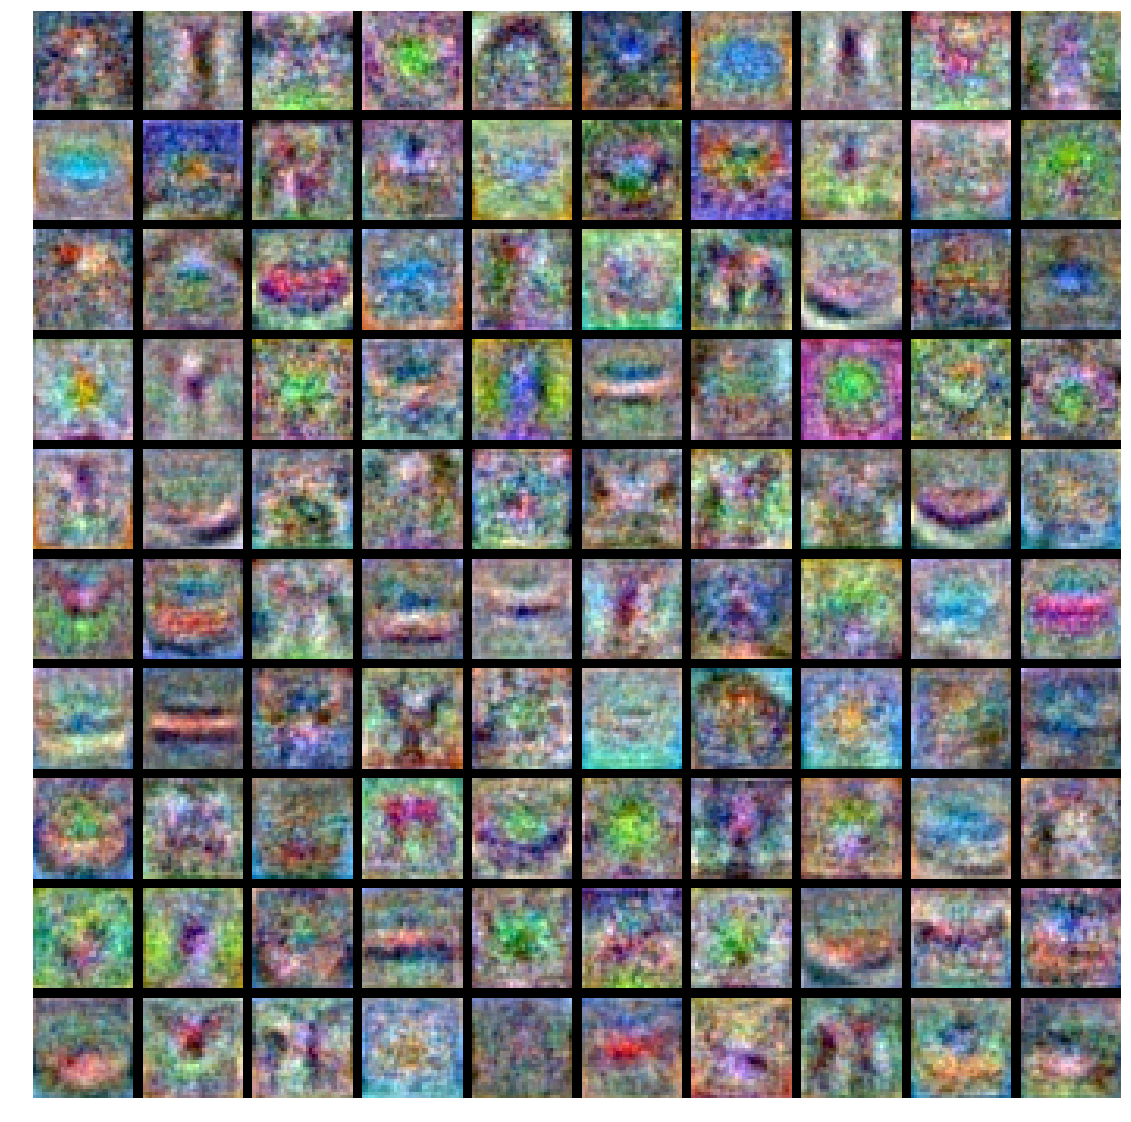

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

### Inline Question:
Describe what your visualized two-layer-net weights look like, in particular in contrast to the softmax weights of the first exercise of this set.

**Your answer:** *Looks different.. maybe median *








# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [48]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.555


## Save the model

When you are satisfied with your training, save the model for submission.

In [49]:
from dl4cv.model_savers import save_two_layer_net
#best_net = net
save_two_layer_net(best_net)

## Scoring function
We will score the model you have just saved based on the classification accuracy on our test dataset. The scoring function should represent the difficulty of obtaining a good test accuracy and should therefore give 0 points for worse results than random guessing, should be linear in a first regime and exponential beyond that. The onset of exponential growth depends on the problem. In that region you get twice as many points for an additional 10% accuracy.

For this problem we specifically use the following scoring function:

$$f(x) = \left\{
	\begin{array}{ll}
		0  & \mbox{if } x \leq 0.1 \\
		100x & \mbox{if } 0.1 < x \leq 0.5 \\
        \left(\frac{50}{\exp(0.5 \ln(2)/0.1)}\right) \exp(x \ln(2)/0.1) & \mbox{if } 0.5 < x \leq 1
	\end{array}
\right.$$

The function can be plotted in the following cell.

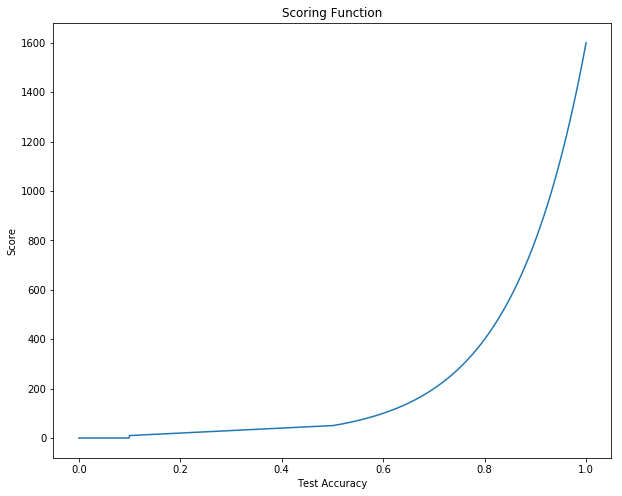

In [ ]:
from dl4cv.data_utils import scoring_function

x = np.linspace(0, 1, num=1000)
plt.plot(x, scoring_function(x, lin_exp_boundary=0.5, doubling_rate=0.1))
plt.title('Scoring Function')
plt.xlabel('Test Accuracy')
plt.ylabel('Score')